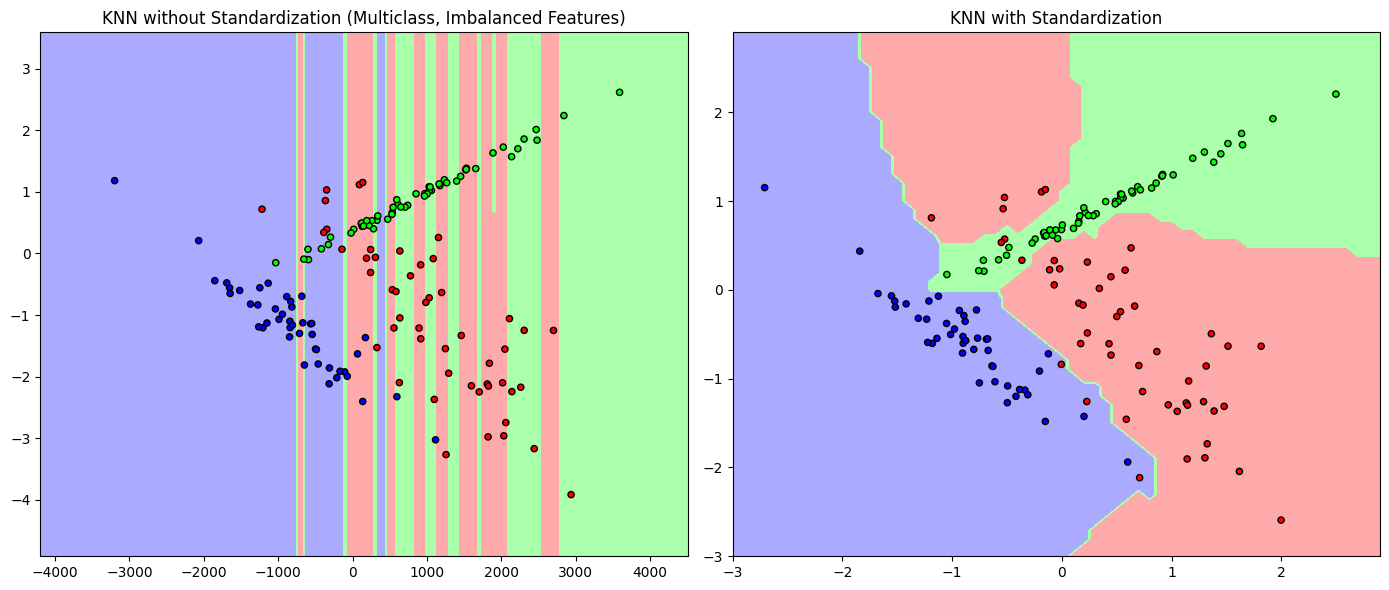

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3, random_state=42)

# Scale one feature up
X[:, 0] = X[:, 0] * 1000  
X[:, 1] = X[:, 1] * 1     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def plot_decision_boundaries(X, y, model, ax, title, std=False):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Create a mesh grid for plotting
    if std:
        x_min, x_max = -3, 3
        y_min, y_max = -3, 3
    else:
        x_min, x_max = X[:, 0].min() - 1000, X[:, 0].max() + 1000
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 100 if not std else 0.1), 
                         np.arange(y_min, y_max, 0.1))

    # Predict class labels for the grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    ax.set_title(title)

# Train KNN without standardization
knn_no_std = KNeighborsClassifier(n_neighbors=5)
knn_no_std.fit(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Train KNN with standardized data
knn_std = KNeighborsClassifier(n_neighbors=3)
knn_std.fit(X_train_std, y_train)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_boundaries(X_test, y_test, knn_no_std, axs[0], title="KNN without Standardization (Multiclass, Imbalanced Features)")
plot_decision_boundaries(X_test_std, y_test, knn_std, axs[1], title="KNN with Standardization", std=True)

plt.tight_layout()
plt.show()
